In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re 
import spacy

Reading data for New York Times.

In [2]:
df1 = pd.read_csv('data1.csv')
df1.head(5)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


Reading data for Atlantic.

In [3]:
df2 = pd.read_csv('data2.csv',encoding= 'unicode_escape')
df2.head(5)

C:\Users\subha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

,Unnamed: 0,id,title,publication,author,Unnamed: 5,year,month,url,content,...,Unnamed: 1177,Unnamed: 1178,Unnamed: 1179,Unnamed: 1180,Unnamed: 1181,Unnamed: 1182,Unnamed: 1183,Unnamed: 1184,Unnamed: 1185,Unnamed: 1186
0,53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,NaN,2017,1,NaN,"Patriots Day, Peter Bergâs new thriller that...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,NaN,2017,1,NaN,"In Norse mythology, humans and our world were ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53295,73474,Obamaâs Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,NaN,2017,1,NaN,âIf our democracy is to work in this increas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,NaN,2017,1,NaN,Updated on January 11 at 5:05 p. m. In his fir...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53297,73476,Trump: âI Thinkâ Hacking Was Russian,Atlantic,Kaveh Waddell,NaN,2017,1,NaN,Updated at 12:25 p. m. After months of equivoc...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reading data for Guardian.

In [4]:
df3 = pd.read_csv('data3.csv',encoding= 'unicode_escape')
df3.head(5)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,Alton Sterlingâs son: âEveryone needs to p...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,103460,151909,Shakespeareâs first four folios sell at auct...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeareâs first four b...
2,103461,151910,My grandmotherâs death saved me from a life ...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


Columns in datasets.

In [5]:
df1.columns

Index(['Unnamed: 0', 'id', 'title', 'publication', 'author', 'date', 'year',
       'month', 'url', 'content'],
      dtype='object')

In [6]:
df2.columns

Index(['Unnamed: 0', 'id', 'title', 'publication', 'author', 'Unnamed: 5',
       'year', 'month', 'url', 'content',
       ...
       'Unnamed: 1177', 'Unnamed: 1178', 'Unnamed: 1179', 'Unnamed: 1180',
       'Unnamed: 1181', 'Unnamed: 1182', 'Unnamed: 1183', 'Unnamed: 1184',
       'Unnamed: 1185', 'Unnamed: 1186'],
      dtype='object', length=1187)

In [7]:
df3.columns

Index(['Unnamed: 0', 'id', 'title', 'publication', 'author', 'date', 'year',
       'month', 'url', 'content'],
      dtype='object')

# Data Preprocessing.

Remove punctuations and special characters.

In [8]:
def rm_puncs(sen):
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for ele in sen:  
        if ele in punc:  
            sen = sen.replace(ele, " ") 
    return sen

Removing non english characters.

In [9]:
def rm_noneng(sen): 
    test_list = word_tokenize(sen)
    res = [idx for idx in test_list if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx)]   
    return res

Removing stopwords.

In [10]:
def rm_stopwords(sen):
    stop_words = set(stopwords.words('english'))  
    filtered = [w for w in sen if not w in stop_words] 
    filtered = []  
    for w in sen: 
        if w not in stop_words: 
            filtered.append(w) 
    return filtered

Showing data preprocessing for two datasets in New York Times.

In [11]:
content = df1['content']
heading = df1['title']
n = df1.count() - 1
for i in range(0,2):
    s1 = rm_noneng(heading[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2)))
    s3 = s3[:-4]
    print(s3,"\n\n")
    s1 = rm_noneng(content[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2))) 
    print(s3,"\n\n")

['House', 'Republicans', 'Fret', 'About', 'Winning', 'Their', 'Health', 'Care', 'Suit'] 


['WASHINGTON', 'Congressional', 'Republicans', 'new', 'fear', 'comes', 'health', 'care', 'lawsuit', 'Obama', 'administration', 'They', 'might', 'win', 'The', 'incoming', 'Trump', 'administration', 'could', 'choose', 'longer', 'defend', 'executive', 'branch', 'suit', 'challenges', 'administration', 'authority', 'spend', 'billions', 'dollars', 'health', 'insurance', 'subsidies', 'Americans', 'handing', 'House', 'Republicans', 'big', 'victory', 'issues', 'But', 'sudden', 'loss', 'disputed', 'subsidies', 'could', 'conceivably', 'cause', 'health', 'care', 'program', 'implode', 'leaving', 'millions', 'people', 'without', 'access', 'health', 'insurance', 'Republicans', 'prepared', 'replacement', 'That', 'could', 'lead', 'chaos', 'insurance', 'market', 'spur', 'political', 'backlash', 'Republicans', 'gain', 'full', 'control', 'government', 'To', 'stave', 'outcome', 'Republicans', 'could', 'find', 'awkwar

Showing data preprocessing for two datasets in Atlantic.

In [12]:
content = df2['content']
heading = df2['title']
n = df1.count() - 1
for i in range(0,2):
    s1 = rm_noneng(heading[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2)))
    print(s3,"\n\n")
    s1 = rm_noneng(content[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2))) 
    print(s3,"\n\n")

['Patriots', 'Day', 'Is', 'Best', 'When', 'It', 'Digs', 'Past', 'Heroism'] 


['Patriots', 'Day', 'Peter', 'Bergâ', 'x80', 'x99s', 'new', 'thriller', 'recreates', '2013', 'Boston', 'Marathon', 'bombing', 'ensuing', 'manhunt', 'followed', 'surprisingly', 'oblique', 'morally', 'ambiguous', 'movie', 'typically', 'straightforward', 'filmmaker', 'Patriots', 'Day', 'takes', 'unexpectedly', 'cynical', 'view', 'chaos', 'rash', 'bureaucratic', 'infighting', 'followed', 'bombing', 'â', 'x80', 'x94', 'question', 'whether', 'Bergâ', 'x80', 'x99s', 'intended', 'message', 'For', 'grim', 'running', 'time', 'movie', 'celebrates', 'men', 'ground', 'helped', 'bring', 'bombers', 'justice', 'itâ', 'x80', 'x99s', 'glimpses', 'something', 'complicated', 'jingoism', 'really', 'linger', 'The', 'scene', 'best', 'illustrates', 'dichotomy', 'comes', 'late', 'Patriots', 'Day', 'As', 'search', 'one', 'bombers', 'Dzhokhar', 'Tsarnaev', 'intensifies', 'brotherâ', 'x80', 'x99s', 'wife', 'Katherine', 'Melissa', 'Benoi

Showing data preprocessing for two datasets in The Guardian.

In [13]:
content = df3['content']
heading = df3['title']
n = df1.count() - 1
for i in range(0,2):
    s1 = rm_noneng(heading[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2)))
    print(s3,"\n\n")
    s1 = rm_noneng(content[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2))) 
    print(s3,"\n\n")

['Alton', 'Sterlingâ', 'x80', 'x99s', 'son', 'â', 'x80', 'x99Everyone', 'needs', 'protest', 'right', 'way', 'peaceâ', 'x80', 'x99'] 


['The', 'son', 'Louisiana', 'man', 'whose', 'father', 'shot', 'killed', 'range', 'Baton', 'Rouge', 'police', 'asked', 'protesters', 'â', 'x80', 'x9cpeaceâ', 'x80', 'x9d', 'â', 'x80', 'x9cno', 'violence', 'none', 'whatsoeverâ', 'x80', 'x9d', 'Cameron', 'Sterling', 'son', 'Alton', 'Sterling', 'whose', 'death', 'hands', 'police', 'caught', 'video', 'spoke', 'father', 'protests', 'Alton', 'Sterling', 'killed', 'Baton', 'Rouge', 'police', '5', 'July', 'convenience', 'store', 'said', 'selling', 'CDs', 'Baton', 'Rouge', 'police', 'said', 'statement', 'police', 'called', 'convenience', 'store', 'Sterling', 'allegedly', 'threatened', 'another', 'patron', 'gun', 'The', 'press', 'conference', 'Wednesday', 'Cameronâ', 'x80', 'x99s', 'first', 'since', 'broke', 'sobs', 'nationally', 'broadcast', 'press', 'conference', 'mother', 'following', 'fatherâ', 'x80', 'x99s', 

# K Means Clustering.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K Means Clustering.

In [15]:
def kclust_elb(heading):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(heading1)
    cost =[]
    for i in range(1,22):
        model = KMeans(n_clusters=i,max_iter=500)
        model.fit(X)
        cost.append(model.inertia_)
    plt.plot(range(1, 22), cost, color ='g', linewidth ='3') 
    plt.xlabel("Value of K") 
    plt.ylabel("Sqaured Error (Cost)") 
    plt.show()

For New York Times.

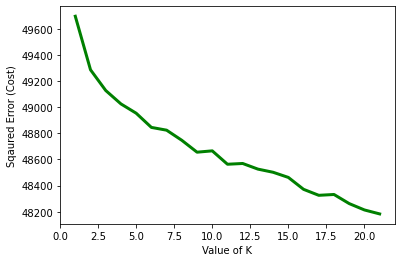

In [16]:
heading1 = np.array(df1['title'])
model1 = kclust_elb(heading1)

For Atlantic.

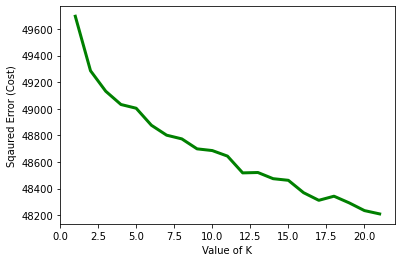

In [17]:
heading2 = np.array(df2['title'].values.astype('U'))
#For Atlantic.
model2 = kclust_elb(heading2)

For The Guardian.

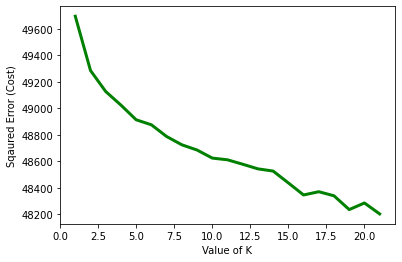

In [18]:
heading3 = np.array(df3['title'].values.astype('U'))
model3 = kclust_elb(heading3)

# DBSCAN Clustering

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
def dbs(heading):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(heading)
    true_k = 2
    model = DBSCAN(eps=2,min_samples = 3, metric = 'euclidean')
    model.fit(X)
    return model  

For New York Times.

In [ ]:
model11 = dbs(heading1)

For Atlantic.

In [ ]:
model22 = dbs(heading2)

For Guardian.

In [ ]:
model33 = dbs(heading3)

# VADER Sentiment Analysis.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [ ]:
def vaders(article):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(article)
    return sentiment_dict

In [ ]:
sent = df1['content'][0]
sentiment_dict = vaders(sent)
print(sentiment_dict)

# Text Blob Sentiment Analysis.

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
def textblob_sentiment(article):
    analysis = TextBlob(article).polarity
    return analysis

In [ ]:
sent = df1['content'][0]
sentiment = textblob_sentiment(sent)
print(sentiment)